## NBA Shooting Data

he collection comprises shots captured by four different players during the play-offs. Although the NBA website does not provide information about the defenders for each shot, this data can still be utilized to address intriguing inquiries.

***Dataset***

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.read_csv("dataset/datacamp_workspace_export_2023-07-10 22_59_50.csv", index_col=0)


,X,Y,RANGE,DEFENDER,SCORE
SHOOTER,,,,,
Seth Curry,-3.808987,5.583621,"""(0, 4)""",Chris Paul,MADE
Seth Curry,-0.104279,5.919138,"""(0, 4)""",Trae Young,MADE
Seth Curry,-0.525864,8.912239,"""(0, 4)""",Trae Young,MADE
Seth Curry,-0.790616,7.503782,"""(0, 4)""",Chris Paul,MADE
Seth Curry,2.119074,5.320534,"""(0, 4)""",Trae Young,MADE
...,...,...,...,...,...
Trae Young,23.952742,15.324875,"""(25, 29)""",Russell Westbrook,MISSED
Trae Young,6.221766,30.756008,"""(25, 29)""",Seth Curry,MISSED
Trae Young,16.397467,27.660323,"""(25, 29)""",Chris Paul,MISSED


**Calculate the most likely scoring range for each players**

In [36]:
data = pd.read_csv("dataset/datacamp_workspace_export_2023-07-10 22_59_50.csv", index_col=0)

In [37]:
# Calculate the most likely scoring range for each player
scoring_range = data.groupby(['SHOOTER', 'DEFENDER', 'RANGE']).size().groupby(['SHOOTER', 'DEFENDER']).idxmax()

# Display the results
scoring_range.to_frame(name='SCORING_RANGE').reset_index()

,SHOOTER,DEFENDER,SCORING_RANGE
0,Chris Paul,Russell Westbrook,"(Chris Paul, Russell Westbrook, ""(15, 19)"")"
1,Chris Paul,Seth Curry,"(Chris Paul, Seth Curry, ""(10, 14)"")"
2,Chris Paul,Trae Young,"(Chris Paul, Trae Young, ""(10, 14)"")"
3,Russell Westbrook,Chris Paul,"(Russell Westbrook, Chris Paul, ""(15, 19)"")"
4,Russell Westbrook,Seth Curry,"(Russell Westbrook, Seth Curry, ""(15, 19)"")"
5,Russell Westbrook,Trae Young,"(Russell Westbrook, Trae Young, ""(0, 4)"")"
6,Seth Curry,Chris Paul,"(Seth Curry, Chris Paul, ""(25, 29)"")"
7,Seth Curry,Russell Westbrook,"(Seth Curry, Russell Westbrook, ""(25, 29)"")"
8,Seth Curry,Trae Young,"(Seth Curry, Trae Young, ""(25, 29)"")"
9,Trae Young,Chris Paul,"(Trae Young, Chris Paul, ""(25, 29)"")"


Plot the shots made by X and Y position, differentiated by player


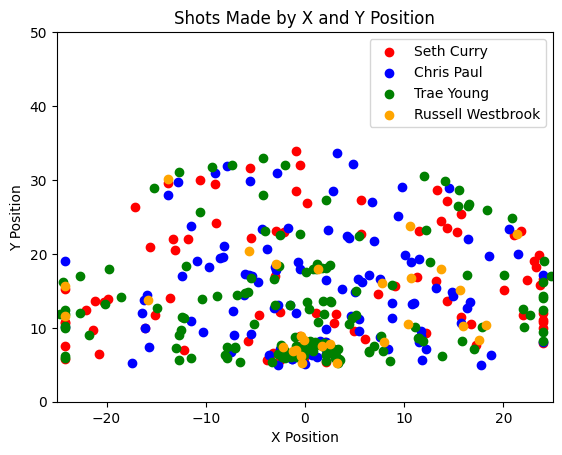

In [46]:
# Define colors for each player
player_colors = {
    'Seth Curry': 'red',
    'Chris Paul': 'blue',
    'Trae Young': 'green',
    'Russell Westbrook': 'orange'
}
# print(data)
data.reset_index(inplace=True)
# Plot the shots made by X and Y position, differentiated by player
for player, color in player_colors.items():
    player_data = data[data['SHOOTER'] == player]
    made_shots = player_data[player_data['SCORE'] == 'MADE']
    x = made_shots['X']
    y = made_shots['Y']
    plt.scatter(x, y, color=color, label=player)

# Set plot title and labels
plt.title('Shots Made by X and Y Position')
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Set plot limits based on the court dimensions
plt.xlim(-25, 25)
plt.ylim(0, 50)

# Add a legend
plt.legend()

# Display the plot
plt.show()

**Are players more likely to score a shot the closer they get to the basket**

In [47]:
# Add a column to indicate whether the shot was made or missed
data['MADE'] = data['SCORE'] == 'MADE'

# Calculate shooting percentage for each range
shooting_percentage = data.groupby('RANGE')['MADE'].mean()

# Display the shooting percentage for each range
print(shooting_percentage)

RANGE
"(0, 4)"      0.550000
"(10, 14)"    0.478261
"(15, 19)"    0.462121
"(20, 24)"    0.488095
"(25, 29)"    0.383495
"(5, 9)"      0.489583
Name: MADE, dtype: float64


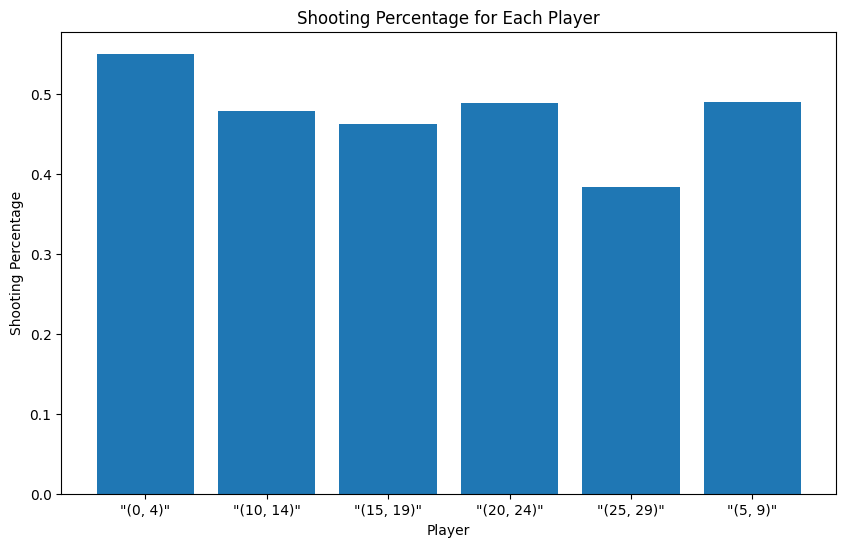

In [40]:
# Plot the shooting percentage for each player
plt.figure(figsize=(10, 6))
plt.bar(shooting_percentage.index, shooting_percentage.values)
plt.xlabel('Player')
plt.ylabel('Shooting Percentage')
plt.title('Shooting Percentage for Each Player')
plt.show()

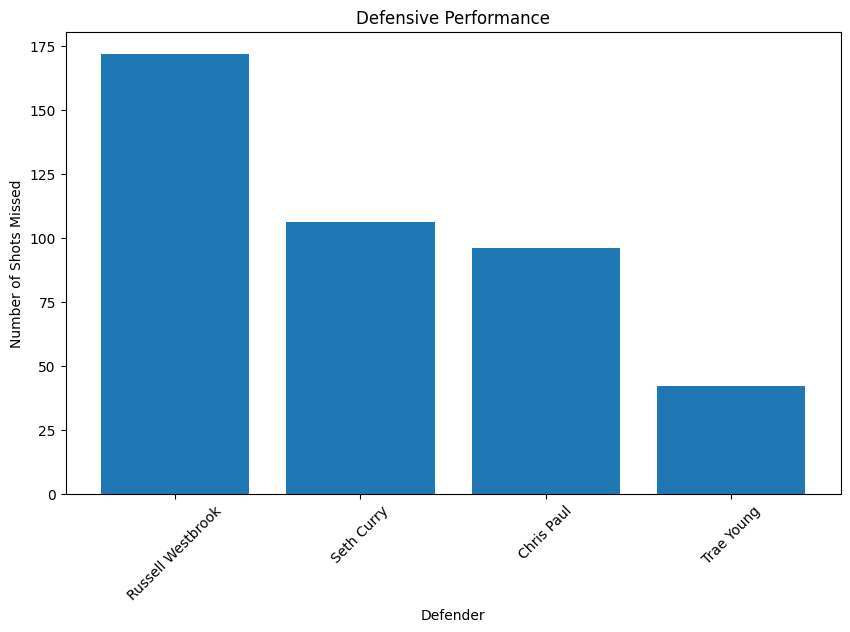

In [41]:
# Calculate the number of shots missed by the opponents for each defender
missed_shots = data[data['SCORE'] == 'MISSED'].groupby('DEFENDER')['SCORE'].count()

# Sort the defenders based on the number of missed shots
missed_shots = missed_shots.sort_values(ascending=False)

# Plot the defensive performance
plt.figure(figsize=(10, 6))
plt.bar(missed_shots.index, missed_shots.values)
plt.xlabel('Defender')
plt.ylabel('Number of Shots Missed')
plt.title('Defensive Performance')
plt.xticks(rotation=45)
plt.show()

**correlation between the efficiency of a shooter and the player who is defending him**

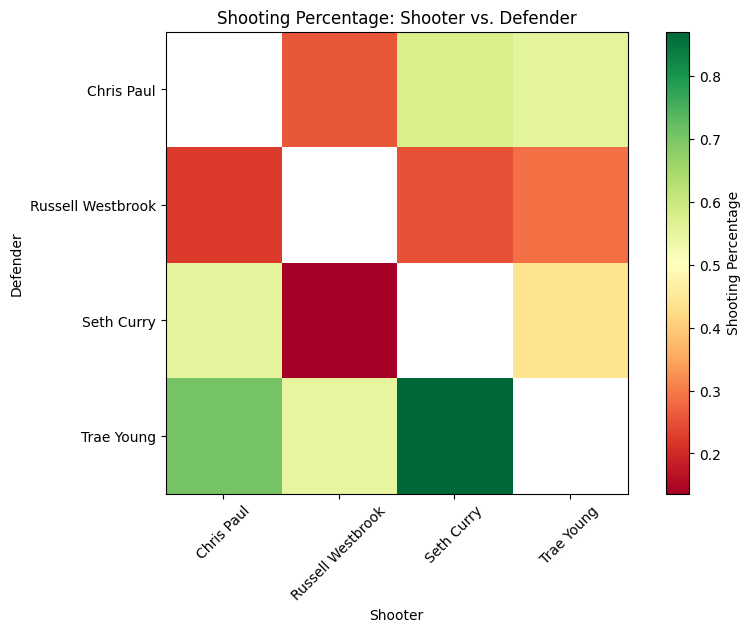

In [48]:
shooting_percentage = data.groupby(['SHOOTER', 'DEFENDER'])['SCORE'].apply(lambda x: (x == 'MADE').mean()).reset_index()

# Pivot the data to create a shooter vs defender matrix of shooting percentages
shooting_matrix = shooting_percentage.pivot(index='DEFENDER', columns='SHOOTER', values='SCORE')

# Plot the shooting matrix as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(shooting_matrix, cmap='RdYlGn', interpolation='nearest')
plt.colorbar(label='Shooting Percentage')
plt.xlabel('Shooter')
plt.ylabel('Defender')
plt.title('Shooting Percentage: Shooter vs. Defender')
plt.xticks(range(len(shooting_matrix.columns)), shooting_matrix.columns, rotation=45)
plt.yticks(range(len(shooting_matrix.index)), shooting_matrix.index)
plt.show()